In [14]:
import numpy as np
import pandas as pd

Load the car csv table

In [15]:
car_data_table = pd.read_csv("../data/cars_com_clean.csv")

In [16]:
print (car_data_table.head(3))

                                name  year          maker    price  \
0  2010 Mercedes-Benz  GL 450 4MATIC  2010  Mercedes-Benz  15614.0   
1         2015 Mercedes-Benz  ML 350  2015  Mercedes-Benz  29998.0   
2   2013 Mercedes-Benz  E 350 4MATIC  2013  Mercedes-Benz  16500.0   

           seller_name    seller_phone     miles exterior_color  \
0  Kayser Ford Lincoln  (608) 807-5359  107545.0          Black   
1       CarMax Madison  (608) 286-3923   36642.0           Gray   
2     Lexus of Madison  (608) 478-2660   80614.0          Black   

  interior_color            transmission drivetrain                vin  id  
0       Cashmere       7-Speed Automatic        AWD  4JGBF7BEXAA543808   0  
1          Black  7-Speed Automatic w/OD        AWD  4JGDA5HB7FA445741   1  
2          Black       7-Speed Automatic        AWD  WDDHF8JB7DA667069   2  


We compare three luxury cars in the same level including Mercedes-Benz E350, BMW 530, Audi A6. First, we extract these cars from the table. We study the correlation between the car prices versus year.

1. Extract the Benz E350 data

In [17]:
benz_cars = car_data_table.query('maker == "Mercedes-Benz"')
benz_E350 = benz_cars[benz_cars['name'].str.contains('E 350')].dropna(subset=['price'])
benz_E350.shape

(85, 13)

Find the year atrtibutes in the benz_E350 car dataset.

In [18]:
benz_years = benz_E350.groupby(['year']).groups.keys()

In [19]:
benz_E350_grouped = benz_E350.groupby('year').agg({"price":[min, max, 'mean']}).rename(columns={"min":"min_car_price", "max":"max__car_price", "mean":"mean_car_price"})
benz_E350_grouped

price                              
     min_car_price max__car_price mean_car_price
year                                            
2006        8950.0         8950.0    8950.000000
2008        8500.0        11995.0   10247.500000
2010       17985.0        17985.0   17985.000000
2012       20730.0        20730.0   20730.000000
2013       14995.0        28500.0   19972.875000
2014       19990.0        33995.0   26293.500000
2015       29855.0        34396.0   31552.750000
2016       33480.0        37980.0   36230.000000
2017       45000.0        71999.0   54226.700000
2018       60590.0        70075.0   64682.708333

Similarly, we perform the query and analysis on BMW 535.

In [20]:
BMW_cars = car_data_table.query('maker == "BMW"')
BMW_535 = BMW_cars[BMW_cars['name'].str.contains('535')].dropna(subset=['price'])
BMW_years = BMW_535.groupby(['year']).groups.keys()
BMW_535_grouped = BMW_535.groupby('year').agg({"price":[min, max, 'mean']}).rename(columns={"min":"min_car_price", "max":"max__car_price", "mean":"mean_car_price"})
BMW_535_grouped

price                              
     min_car_price max__car_price mean_car_price
year                                            
2008        8777.0         8777.0    8777.000000
2009       10995.0        10995.0   10995.000000
2010        9990.0        13785.0   11756.666667
2011       12776.0        27995.0   15944.888889
2013       18863.0        22990.0   20282.666667
2014       27480.0        28990.0   28235.000000
2015       26899.0        35985.0   32460.357143
2016       32230.0        46622.0   39943.250000
2017       62422.0        62422.0   62422.000000

Similarly, we perform the query and analysis on Audi A6.

In [21]:
Audi_cars = car_data_table.query('maker == "Audi"')
Audi_A6 = Audi_cars[Audi_cars['name'].str.contains('A6')].dropna(subset=['price'])
Audi_years = Audi_A6.groupby(['year']).groups.keys()
Audi_A6_grouped = Audi_A6.groupby('year').agg({"price":[min, max, 'mean']}).rename(columns={"min":"min_car_price", "max":"max__car_price", "mean":"mean_car_price"})
Audi_A6_grouped

price                              
     min_car_price max__car_price mean_car_price
year                                            
2006        7499.0         8479.0    7989.000000
2008        8350.0         8350.0    8350.000000
2011       14588.0        14588.0   14588.000000
2013       15995.0        16767.0   16381.000000
2014       19499.0        36998.0   27249.416667
2015       27000.0        35998.0   30707.363636
2016       30730.0        58879.0   38851.857143
2017       40730.0        68535.0   51181.250000
2018       39995.0        68260.0   60550.931034

Plot car mean price versus year for visualization.

Text(0.5,1,'Luxury Car Price Analysis versus Year')

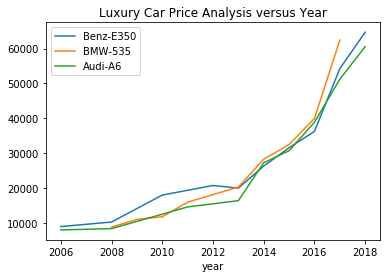

In [22]:
E350_mean_prices = benz_E350_grouped['price','mean_car_price']
ax = E350_mean_prices.plot()
BMW535_mean_prices = BMW_535_grouped['price','mean_car_price']
axx = BMW535_mean_prices.plot(legend=True)
Audi_A6_mean_prices = Audi_A6_grouped['price','mean_car_price']
ax = Audi_A6_mean_prices.plot(legend=True)
ax.legend(["Benz-E350","BMW-535","Audi-A6"])
ax.set_title('Luxury Car Price Analysis versus Year')

Some insights:
1. All three models of luxury car exhibits a similar price decreasing pattern as year increases.
2. BMW has the largest car price drop with in first two years after purchase.
3. The car price decreasing rate versus year tends to be much slower after the cars has been used for 6 years.

In [24]:
benz_E350_grouped.columns

MultiIndex(levels=[['price'], ['max__car_price', 'mean_car_price', 'min_car_price']],
           labels=[[0, 0, 0], [2, 0, 1]])